In [54]:
import pandas as pd
import boto3
import sagemaker
import os

In [32]:
operations_df = pd.read_csv("data/training_data_operations.csv", header=None, names = [ "label", "text"])

In [39]:
operations_df.head()

,label,text
0,Update,Change timezone on server\n Please change the ...
1,Update,UpdateTimeZone\n Change to AEST time zone as r...
2,Update,Update temporary user on i-183865cdfgawerk3 (M...
3,Update,EC2 name change\n Hi Team\n\nRequesting to cha...
4,Update,Update the cron task on ec2 instance\n Update ...


In [40]:
%matplotlib inline

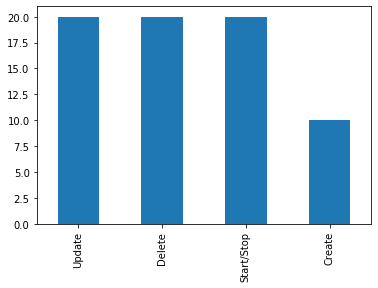

In [41]:
operations_df['label'].value_counts().plot(kind='bar')

In [45]:
resources_df = pd.read_csv("data/training_data_resources.csv", header=None, names=["label", "text"])

In [46]:
resources_df.head()

,label,text
0,EC2,Change timezone on server\n Please change the ...
1,EC2,UpdateTimeZone\n Change to AEST time zone as r...
2,EC2,Update temporary user on i-183865cdfgawerk3 (M...
3,EC2,EC2 name change\n Hi Team\n\nRequesting to cha...
4,EC2,Update the cron task on ec2 instance\n Update ...


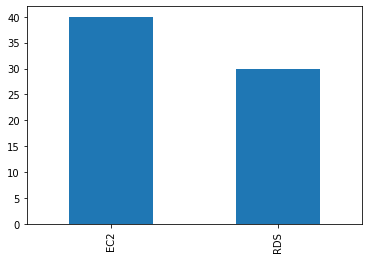

In [47]:
resources_df['label'].value_counts().plot(kind='bar')

In [50]:
s3_client = boto3.client("s3")

In [57]:
sm_session = sagemaker.Session()
bucket = sm_session.default_bucket()
data_prefix = "ticket_classifier"

In [59]:
operations_df_filename = os.path.join("s3://", bucket, data_prefix, "training_data_operations.csv")
resources_df_filename = os.path.join("s3://", bucket, data_prefix, "training_data_resources.csv")

In [64]:
operations_df.to_csv(operations_df_filename, header=None, index=False)
resources_df.to_csv(resources_df_filename, header=None, index=False)

In [65]:
bucket

'sagemaker-us-east-2-869530972998'

In [66]:
operations_df_filename

's3://sagemaker-us-east-2-869530972998/comprehend/ticket_classifier/data/training_data_operations.csv'

In [67]:
resources_df_filename

's3://sagemaker-us-east-2-869530972998/comprehend/ticket_classifier/data/training_data_resources.csv'